<a href="https://colab.research.google.com/github/SachinPrasanth777/flask-app/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('LoanApprovalPrediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598,598,598,586.000000,598,598,598.000000,598.000000,577.000000,584.000000,549.000000,598,598
unique,598,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,487,388,NaN,465,488,NaN,NaN,NaN,NaN,NaN,225,411
mean,NaN,NaN,NaN,0.755973,NaN,NaN,5292.252508,1631.499866,144.968804,341.917808,0.843352,NaN,NaN
std,NaN,NaN,NaN,1.007751,NaN,NaN,5807.265364,2953.315785,82.704182,65.205994,0.363800,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3806.000000,1211.500000,127.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,1.750000,NaN,NaN,5746.000000,2324.000000,167.000000,360.000000,1.000000,NaN,NaN


In [4]:
print(df.columns.tolist())
df.isnull().sum()
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head(10)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


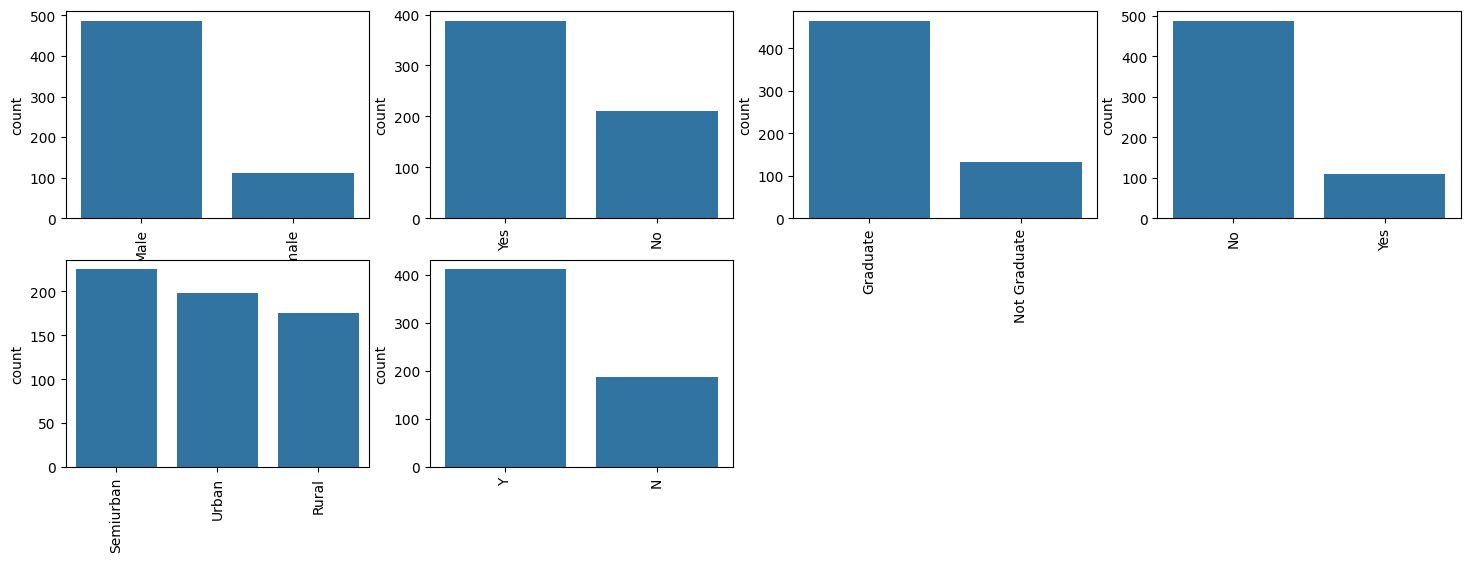

In [5]:
obj = (df.dtypes == 'object')
obj_col = list(obj[obj].index)
plt.figure(figsize=(18,35))
index = 1
for col in obj_col:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index),y=y)
  index+=1

In [6]:
missing_values = df.isnull().sum()
missing_value = missing_values[missing_values>0]
columns = missing_value.index.tolist()
print(columns)

['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [7]:
replace = ['LoanAmount','Loan_Amount_Term']
for cols in replace:
  df[cols].fillna(df[cols].mean(),inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [8]:
normalise = ['Dependents','Credit_History']
for cols in normalise:
  mode = df[cols].mode()[0]
  df[cols].fillna(mode,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [9]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [10]:
obj = (df.dtypes == 'object')
cols = list(obj[obj].index)
for col in cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [11]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,0.095951,-0.552892,-3.501564e-16,0.280854,1.0,2,1
1,1,1,1.0,0,0,-0.122234,-0.041852,-2.090562e-01,0.280854,1.0,0,0
2,1,1,0.0,0,1,-0.395052,-0.552892,-9.728983e-01,0.280854,1.0,2,1
3,1,1,0.0,1,0,-0.466919,0.246201,-3.076165e-01,0.280854,1.0,2,1
4,1,0,0.0,0,0,0.121975,-0.552892,-4.889580e-02,0.280854,1.0,2,1


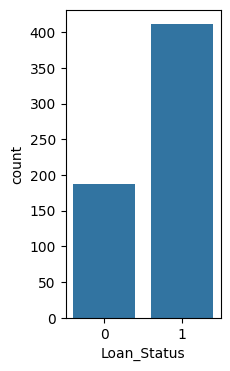

In [12]:
plt.figure(figsize=(2,4))
sns.countplot(x='Loan_Status',data=df)
plt.show()

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=10)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (568, 11)
X_test shape: (30, 11)
y_train shape: (568,)
y_test shape: (30,)


In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model,X,y,cv=75)
  print("==" * 30)
  print(model_name)
  print(f"Cross-Validation Scores: {scores}")
  print(f"Mean Accuracy: {np.mean(scores):.4f}")

Logistic Regression
Cross-Validation Scores: [0.875      0.75       0.875      1.         0.75       0.75
 0.75       0.875      0.875      0.875      0.875      1.
 0.875      0.875      0.625      0.875      0.75       0.625
 1.         0.875      0.75       0.75       0.75       0.875
 0.75       0.875      0.875      0.75       1.         0.75
 0.875      0.75       0.75       0.75       0.875      0.875
 0.625      0.625      0.875      0.75       0.625      0.75
 0.875      0.75       0.75       0.875      0.75       0.625
 0.75       0.75       0.75       1.         0.75       0.75
 0.875      0.875      0.875      0.75       0.875      0.875
 0.75       0.75       0.875      0.5        0.75       0.75
 0.75       1.         1.         0.875      0.625      0.75
 0.75       1.         0.85714286]
Mean Accuracy: 0.8064
Random Forest Classifier
Cross-Validation Scores: [0.875      0.75       0.875      0.875      0.75       0.75
 0.875      0.875      0.75       0.875      0.875  

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7333333333333333


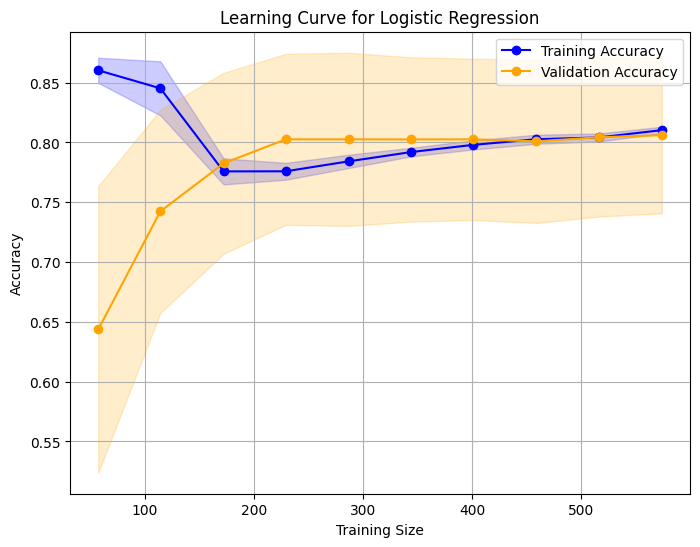

In [28]:
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=25, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

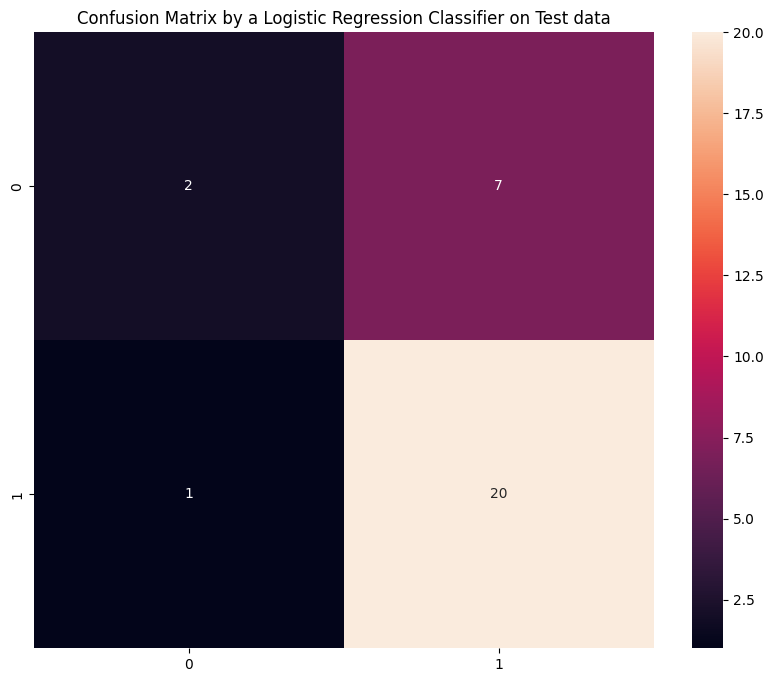

In [27]:
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix by a Logistic Regression Classifier on Test data")
plt.show()